In [1]:
import pandas as pd
import numpy as np

# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

article_data = pd.read_csv("data/texts.csv", delimiter=',')

article_data.head()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity;;
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109.0,0.0,1.0,7.0,9.0,0.0,5.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18;;
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309.0,21.0,4.0,1.0,19.0,1.0,4.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14;;
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149.0,6.0,1.0,8.0,14.0,0.0,5.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18;;
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305.0,18.0,5.0,7.0,26.0,0.0,10.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20;;
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491.0,23.0,8.0,33.0,47.0,0.0,12.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24;;


In [2]:
article_data.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,...,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,694.370594,38.810675,13.843907,20.538771,66.202417,1.046324,11.369587,74.752266,47.269889,2.132931,...,4.322256,2.688822,19.093656,5.389728,29.918429,4.349446,17.019134,11.805639,0.927492,0.994965
std,522.118710,32.060622,13.545949,22.696782,51.956638,1.655839,12.572746,55.602773,38.370746,2.818153,...,6.605905,4.816057,16.694549,5.752644,25.288903,5.098796,17.739849,12.269056,0.259457,0.070816
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,13.000000,4.000000,7.000000,24.000000,0.000000,3.000000,31.000000,19.000000,0.000000,...,0.000000,0.000000,6.000000,1.000000,11.000000,1.000000,4.000000,3.000000,1.000000,1.000000
50%,624.000000,33.000000,10.000000,14.000000,57.000000,0.000000,8.000000,67.000000,40.000000,1.000000,...,2.000000,1.000000,14.000000,4.000000,24.000000,3.000000,11.000000,8.000000,1.000000,1.000000
75%,950.000000,56.000000,20.000000,26.000000,93.000000,1.000000,15.000000,102.000000,65.000000,3.000000,...,6.000000,3.000000,28.000000,8.000000,44.000000,6.000000,25.000000,18.000000,1.000000,1.000000
max,4283.000000,237.000000,97.000000,225.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,80.000000,44.000000,127.000000,39.000000,220.000000,31.000000,142.000000,97.000000,1.000000,1.000000


# Cleaning Data

In [3]:
article_data.columns

Index(['TextID', 'URL', 'Label', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'baseform',
       'Quotes', 'questionmarks', 'exclamationmarks', 'fullstops', 'commas',
       'semicolon', 'colon', 'ellipsis', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'compsupadjadv', 'past', 'imperative', 'present3rd',
       'present1st2nd', 'sentence1st', 'sentencelast', 'txtcomplexity;;'],
      dtype='object')

In [4]:
# Remove the ';;' that were added by the reader at the end

article_data.rename(columns={'txtcomplexity;;': 'txtcomplexity'}, inplace=True)
article_data['txtcomplexity'] = article_data['txtcomplexity'].str.replace(';;', '')
article_data['txtcomplexity'] = article_data['txtcomplexity'].str.replace(';', '')

article_data.head()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109.0,0.0,1.0,7.0,9.0,0.0,5.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309.0,21.0,4.0,1.0,19.0,1.0,4.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149.0,6.0,1.0,8.0,14.0,0.0,5.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305.0,18.0,5.0,7.0,26.0,0.0,10.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491.0,23.0,8.0,33.0,47.0,0.0,12.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24


In [5]:
# This line tells the notebook to show plots inside of the notebook
#article_data.corr()[Label]

print(article_data.columns)

article_data = article_data.drop('URL', axis=1)

print(article_data.columns)

Index(['TextID', 'URL', 'Label', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'baseform',
       'Quotes', 'questionmarks', 'exclamationmarks', 'fullstops', 'commas',
       'semicolon', 'colon', 'ellipsis', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'compsupadjadv', 'past', 'imperative', 'present3rd',
       'present1st2nd', 'sentence1st', 'sentencelast', 'txtcomplexity'],
      dtype='object')
Index(['TextID', 'Label', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VB

In [6]:
indicators = article_data.drop(['TextID', 'Label'], axis=1)
labels = article_data['Label']

In [7]:
if article_data.isnull().any().any():
    print('Missing values')
else:
    print('No Missing values')

Missing values


In [8]:


null_mask = article_data.isnull().any(axis=1)
null_rows = article_data[null_mask]
null_rows



,TextID,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
460,"Text0481,""http://www.chicagotribune.com/sports...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,"Text0550,""http://www.skysports.com/opinion/sto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,"Text0661,""http://www.skysports.com/story/0,195...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,"Text0694,""http://www.skysports.com/opinion/sto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,"Text0695,""http://www.skysports.com/opinion/sto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,"Text0713,""http://www.skysports.com/opinion/sto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,"Text0981,""http://www.skysports.com/opinion/sto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#a new pandas dataframe with all rows containing missing values dropped from the original article_data dataframe

article_data = article_data.dropna()


#update the indicators and labels to not count the NaN columns

indicators = article_data.drop(['TextID', 'Label'], axis=1)
labels = article_data['Label']


In [10]:
if article_data.isnull().any().any():
    print('Missing values')
else:
    print('No Missing values')
    


No Missing values


In [11]:
print(article_data.iloc[460])

TextID                Text0482
Label                objective
totalWordsCount          485.0
semanticobjscore          11.0
semanticsubjscore          5.0
                       ...    
present3rd                 5.0
present1st2nd              9.0
sentence1st                1.0
sentencelast               1.0
txtcomplexity               10
Name: 461, Length: 61, dtype: object


In [12]:
row = article_data[article_data["TextID"] == "Text0481"]
print(row)

#The problematic row was deleted


Empty DataFrame
Columns: [TextID, Label, totalWordsCount, semanticobjscore, semanticsubjscore, CC, CD, DT, EX, FW, INs, JJ, JJR, JJS, LS, MD, NN, NNP, NNPS, NNS, PDT, POS, PRP, PRP$, RB, RBR, RBS, RP, SYM, TOs, UH, VB, VBD, VBG, VBN, VBP, VBZ, WDT, WP, WP$, WRB, baseform, Quotes, questionmarks, exclamationmarks, fullstops, commas, semicolon, colon, ellipsis, pronouns1st, pronouns2nd, pronouns3rd, compsupadjadv, past, imperative, present3rd, present1st2nd, sentence1st, sentencelast, txtcomplexity]
Index: []

[0 rows x 61 columns]


In [13]:
# A tuple containing the number of rows and columns in the indicators dataset

indicators.shape

(993, 59)

In [14]:
indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 999
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   totalWordsCount    993 non-null    float64
 1   semanticobjscore   993 non-null    float64
 2   semanticsubjscore  993 non-null    float64
 3   CC                 993 non-null    float64
 4   CD                 993 non-null    float64
 5   DT                 993 non-null    float64
 6   EX                 993 non-null    float64
 7   FW                 993 non-null    float64
 8   INs                993 non-null    float64
 9   JJ                 993 non-null    float64
 10  JJR                993 non-null    float64
 11  JJS                993 non-null    float64
 12  LS                 993 non-null    float64
 13  MD                 993 non-null    float64
 14  NN                 993 non-null    float64
 15  NNP                993 non-null    float64
 16  NNPS               993 non

In [15]:
indicators.head()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,109.0,0.0,1.0,7.0,9.0,0.0,5.0,8.0,6.0,0.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18
1,309.0,21.0,4.0,1.0,19.0,1.0,4.0,35.0,23.0,0.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14
2,149.0,6.0,1.0,8.0,14.0,0.0,5.0,15.0,11.0,0.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18
3,305.0,18.0,5.0,7.0,26.0,0.0,10.0,37.0,21.0,1.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20
4,491.0,23.0,8.0,33.0,47.0,0.0,12.0,61.0,36.0,0.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24


In [16]:
indicators.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,...,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,694.370594,38.810675,13.843907,20.538771,66.202417,1.046324,11.369587,74.752266,47.269889,2.132931,...,4.322256,2.688822,19.093656,5.389728,29.918429,4.349446,17.019134,11.805639,0.927492,0.994965
std,522.118710,32.060622,13.545949,22.696782,51.956638,1.655839,12.572746,55.602773,38.370746,2.818153,...,6.605905,4.816057,16.694549,5.752644,25.288903,5.098796,17.739849,12.269056,0.259457,0.070816
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,13.000000,4.000000,7.000000,24.000000,0.000000,3.000000,31.000000,19.000000,0.000000,...,0.000000,0.000000,6.000000,1.000000,11.000000,1.000000,4.000000,3.000000,1.000000,1.000000
50%,624.000000,33.000000,10.000000,14.000000,57.000000,0.000000,8.000000,67.000000,40.000000,1.000000,...,2.000000,1.000000,14.000000,4.000000,24.000000,3.000000,11.000000,8.000000,1.000000,1.000000
75%,950.000000,56.000000,20.000000,26.000000,93.000000,1.000000,15.000000,102.000000,65.000000,3.000000,...,6.000000,3.000000,28.000000,8.000000,44.000000,6.000000,25.000000,18.000000,1.000000,1.000000
max,4283.000000,237.000000,97.000000,225.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,80.000000,44.000000,127.000000,39.000000,220.000000,31.000000,142.000000,97.000000,1.000000,1.000000


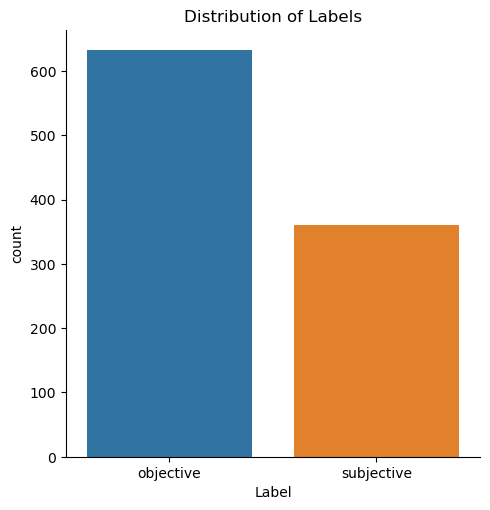

In [17]:
# Distribution of Labels

sb.catplot(x='Label', kind='count', data=article_data)


plt.title('Distribution of Labels')
plt.show()

In [18]:
# almost all data is numerical, 
# except for the "sentence1st" and "sentencelast" that are binary indicators that are the class of the respective sentence
# this classes are


nums = indicators.drop(['sentence1st', 'sentencelast'], axis=1).columns


In [19]:
print("First sentence")

indicators['sentence1st'].value_counts()

First sentence


1.0    921
0.0     72
Name: sentence1st, dtype: int64

In [20]:
print("Last sentence")

indicators['sentencelast'].value_counts()

Last sentence


1.0    988
0.0      5
Name: sentencelast, dtype: int64

# Indicator Exploration

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [22]:
# data normalization
normalizer = MinMaxScaler()

#Training set e Test set
ind_train, ind_test, l_train, l_test = train_test_split(indicators, labels, random_state=23, stratify=labels)

# Scale the data
# (prevent features from "dominating" the model)
ind_train.loc[:, nums] = normalizer.fit_transform(ind_train[nums])
ind_test.loc[:, nums] = normalizer.transform(ind_test[nums])





In [24]:
# VARIANCE
variance = ind_train.var()

# sort variance
variance = variance.sort_values()
# get 10 lower variances
variance[:10]

NNP                 0.000000
WRB                 0.000000
ellipsis            0.001344
JJS                 0.003012
sentencelast        0.005355
semicolon           0.005632
colon               0.005998
PDT                 0.006404
exclamationmarks    0.006838
pronouns1st         0.006966
dtype: float64

In [25]:
low_var_indicators = ['NNP', 'WRB', 'ellipsis', 'JJS']

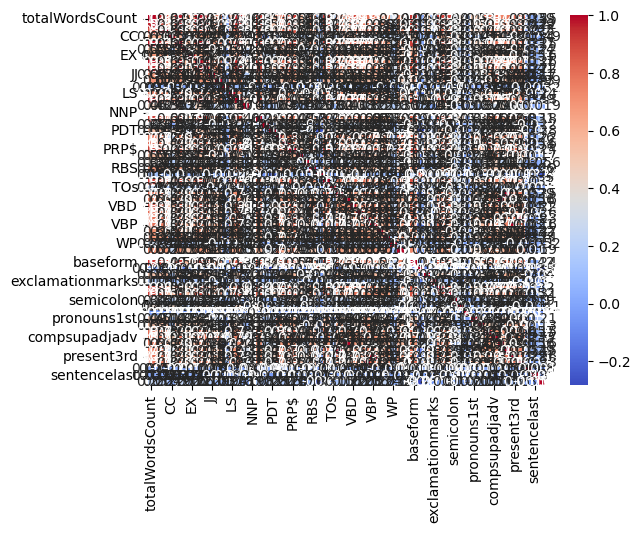

In [26]:
# CORRELATION

correlation_matrix = ind_train.corr()

# show the matrix
sb.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()
